In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import seaborn as sb
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
import io
data = io.BytesIO(uploaded['Train.csv']) 

In [ ]:
#Read train dataset
import pandas as pd   
data = pd.read_csv('Train.csv', header = 0)
data.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
City,1.000000,0.012551,-0.024306,-0.049994,-0.051779,0.033183,0.004762,-0.087463
Location_Score,0.012551,1.000000,-0.358629,-0.205775,-0.264536,-0.042139,-0.074364,-0.423956
Internal_Audit_Score,-0.024306,-0.358629,1.000000,0.453839,0.365133,0.007685,0.112093,0.586097
External_Audit_Score,-0.049994,-0.205775,0.453839,1.000000,0.433374,-0.038786,0.141163,0.435619
Fin_Score,-0.051779,-0.264536,0.365133,0.433374,1.000000,-0.078573,0.138111,0.362463
Loss_score,0.033183,-0.042139,0.007685,-0.038786,-0.078573,1.000000,0.081858,0.044888
Past_Results,0.004762,-0.074364,0.112093,0.141163,0.138111,0.081858,1.000000,0.102120
IsUnderRisk,-0.087463,-0.423956,0.586097,0.435619,0.362463,0.044888,0.102120,1.000000


In [ ]:
X1 = data[['IsUnderRisk','City', 'Location_Score', 'Loss_score','Past_Results']]
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(include_bias=False, interaction_only=True)
#fitting the interaction effects
X_inter = interaction.fit_transform(X1)
df_1 = pd.DataFrame(X_inter)
df_1.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2.0,8.032,6.0,0.0,2.0,8.032,6.0,0.0,16.064,12.0,0.0,48.192,0.000,0.0
1,0.0,31.0,77.730,8.0,1.0,0.0,0.000,0.0,0.0,2409.630,248.0,31.0,621.840,77.730,8.0
2,1.0,40.0,59.203,3.0,0.0,40.0,59.203,3.0,0.0,2368.120,120.0,0.0,177.609,0.000,0.0
3,0.0,12.0,73.080,6.0,0.0,0.0,0.000,0.0,0.0,876.960,72.0,0.0,438.480,0.000,0.0
4,1.0,4.0,15.666,7.0,2.0,4.0,15.666,7.0,2.0,62.664,28.0,8.0,109.662,31.332,14.0


In [ ]:
corr_1 = df_1.corr()
corr_1.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.087463,-0.423956,0.044888,0.102120,0.620095,0.591829,0.873462,0.424211,-0.297032,-0.040900,0.032548,-0.339310,-0.137257,0.097820
1,-0.087463,1.000000,0.012551,0.033183,0.004762,0.552443,-0.035389,-0.045188,-0.035205,0.624951,0.883614,0.454218,-0.006658,0.003698,-0.007693
2,-0.423956,0.012551,1.000000,-0.042139,-0.074364,-0.249722,0.264229,-0.359124,-0.205216,0.630293,-0.035312,-0.057433,0.879047,0.434341,-0.066216
3,0.044888,0.033183,-0.042139,1.000000,0.081858,0.081228,0.050358,0.438995,0.076382,-0.054063,0.403833,0.038140,0.338679,0.059800,0.295213
4,0.102120,0.004762,-0.074364,0.081858,1.000000,0.065260,0.028256,0.123393,0.868062,-0.048251,0.015689,0.713281,-0.030920,0.684126,0.930487
5,0.620095,0.552443,-0.249722,0.081228,0.065260,1.000000,0.383602,0.573290,0.264976,0.117000,0.529575,0.318731,-0.191062,-0.084415,0.058406
6,0.591829,-0.035389,0.264229,0.050358,0.028256,0.383602,1.000000,0.531048,0.219062,0.139118,-0.010718,-0.004754,0.291233,0.164629,0.040771
7,0.873462,-0.045188,-0.359124,0.438995,0.123393,0.573290,0.531048,1.000000,0.404533,-0.246121,0.134855,0.048515,-0.168657,-0.085490,0.214339
8,0.424211,-0.035205,-0.205216,0.076382,0.868062,0.264976,0.219062,0.404533,1.000000,-0.145752,-0.012070,0.583141,-0.147106,0.434509,0.825760
9,-0.297032,0.624951,0.630293,-0.054063,-0.048251,0.117000,0.139118,-0.246121,-0.145752,1.000000,0.495300,0.224349,0.518344,0.266938,-0.055305


In [ ]:
data.insert(7, 'city_location', X_inter[:,9], allow_duplicates= False)
data.insert( 8,'location_loss', X_inter[:,12], allow_duplicates= False)

In [ ]:
feature_cols = ['City','Location_Score','Internal_Audit_Score','External_Audit_Score','Fin_Score']
X = data[feature_cols] # Features
Y = data['IsUnderRisk'] # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test
#Model1 : Linear Regression
clf = LinearRegression()
clf = clf.fit(X_train,y_train)
sqrt(mean_squared_error(y_test,clf.predict(X_test)))

0.3694634925666097

In [ ]:
print("Training Score %.4f"%clf.score(X_train, y_train))
print("Testing Score %.4f"%clf.score(X_test,y_test))
print("log_loss", metrics.log_loss(y_test,clf.predict(X_test)))

Training Score 0.4342
Testing Score 0.4307
log_loss 0.4061788641730618


In [ ]:
from sklearn.linear_model import Lasso
clf2 =Lasso(alpha=0.01)
clf2.fit(X_train,y_train)
sqrt(mean_squared_error(y_test,clf2.predict(X_test)))


0.3700467939566155

In [ ]:
print("Training Score %.4f"%clf2.score(X_train, y_train))
print("Testing Score %.4f"%clf2.score(X_test,y_test))
print("log_loss", metrics.log_loss(y_test,clf2.predict(X_test)))

Training Score 0.4342
Testing Score 0.4289
log_loss 0.40800951721384776


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
clf3= LinearRegression()
clf3.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(X_test)
sqrt(mean_squared_error(y_test,clf3.predict(x_test_poly)))

0.7215118765959905

In [ ]:
print("Training Score %.4f"%clf3.score(x_poly, y_train))
print("Testing Score %.4f"%clf3.score(x_test_poly,y_test))
print("log_loss", metrics.log_loss(y_test,clf3.predict(x_test_poly)))

Training Score 0.4169
Testing Score -1.1713
log_loss 2.9943057593942375


In [ ]:
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression(solver="liblinear")
clf4.fit(X_train,y_train)
sqrt(mean_squared_error(y_test,clf4.predict(X_test)))

0.4069940684815211

In [ ]:
print("Training Score %.4f"%clf4.score(X_train, y_train))
print("Testing Score %.4f"%clf4.score(X_test,y_test))
print("log_loss", metrics.log_loss(y_test,clf4.predict_proba(X_test)))

Training Score 0.8000
Testing Score 0.8344
log_loss 0.3808549235357366


In [ ]:
target_count = data['IsUnderRisk'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 203
Class 1: 340
Proportion: 0.6 : 1


In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict
svc = svm.SVC(C=8,kernel='linear',probability=True,class_weight='balanced')
   
clf5 = svc.fit(X_train, y_train) #svm
    
predicted = cross_val_predict(clf5, X_test,y_test, cv=2)
print("accuracy",metrics.accuracy_score(y_test, predicted))
print("f1 score macro",metrics.f1_score(y_test, predicted, average='macro'))
print("f1 score micro",metrics.f1_score(y_test, predicted, average='micro'))
print("precision score",metrics.precision_score(y_test, predicted, average='macro'))
print("recall score",metrics.recall_score(y_test, predicted, average='macro'))

print("classification_report", metrics.classification_report(y_test, predicted))

print("Training Score %.4f"%clf5.score(X_train, y_train))
print("Testing Score %.4f"%clf5.score(X_test,y_test))

accuracy 0.8220858895705522
f1 score macro 0.8203549576255083
f1 score micro 0.8220858895705522
precision score 0.8227190605239385
recall score 0.8364992150706436
classification_report               precision    recall  f1-score   support

           0       0.72      0.91      0.80        65
           1       0.93      0.77      0.84        98

    accuracy                           0.82       163
   macro avg       0.82      0.84      0.82       163
weighted avg       0.84      0.82      0.82       163

Training Score 0.8316
Testing Score 0.8528


In [ ]:
#confusion matrix from last decision tree classifier 
from sklearn.metrics import confusion_matrix
accurate = np.array(y_test)
predicted1 = np.array(predicted)
matrix=confusion_matrix(accurate,predicted1)
print(matrix)

[[59  6]
 [23 75]]


In [ ]:
predicted

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
# predict probabilities
probs = clf5.predict_proba(X_test)

from sklearn.metrics import log_loss
loss = log_loss(y_test, probs)
print(loss)

0.36479877682201367


In [ ]:
clf6 = GaussianNB()
print(cross_val_score(clf6,X,Y,cv=10))
clf6=clf6.fit(X_train, y_train)
predicted = cross_val_predict(clf6, X_test,y_test, cv=10)
# predict probabilities
probs = clf6.predict_proba(X_test)

from sklearn.metrics import log_loss
loss = log_loss(y_test, probs)
print(loss)
print("accuracy",metrics.accuracy_score(y_test, predicted))
print("f1 score macro",metrics.f1_score(y_test, predicted, average='macro'))
print("f1 score micro",metrics.f1_score(y_test, predicted, average='micro'))
print("precision score",metrics.precision_score(y_test, predicted, average='macro'))
print("recall score",metrics.recall_score(y_test, predicted, average='macro'))

print("classification_report", metrics.classification_report(y_test, predicted))

print("Training Score %.4f"%clf6.score(X_train, y_train))
print("Testing Score %.4f"%clf6.score(X_test,y_test))

[0.89090909 0.87272727 0.87272727 0.85185185 0.94444444 0.87037037
 0.85185185 0.77777778 0.83333333 0.72222222]
0.3625398503246941
accuracy 0.8404907975460123
f1 score macro 0.8391284542969937
f1 score micro 0.8404907975460123
precision score 0.8424698795180723
recall score 0.8569858712715855
classification_report               precision    recall  f1-score   support

           0       0.73      0.94      0.82        65
           1       0.95      0.78      0.85        98

    accuracy                           0.84       163
   macro avg       0.84      0.86      0.84       163
weighted avg       0.86      0.84      0.84       163

Training Score 0.8500
Testing Score 0.8528


In [ ]:
#confusion matrix from last decision tree classifier 
from sklearn.metrics import confusion_matrix
accurate = np.array(y_test)
predicted1 = np.array(predicted)
matrix=confusion_matrix(accurate,predicted1)
print(matrix)

[[61  4]
 [22 76]]


In [ ]:
# predict probabilities
probs = clf6.predict_proba(X_test)

from sklearn.metrics import log_loss
loss = log_loss(y_test, probs)
print(loss)

0.3625398503246941


0.30059618128844295
accuracy 0.8466257668711656
f1 score macro 0.8432270226599469
f1 score micro 0.8466257668711656
precision score 0.8401913149104161
recall score 0.8517268445839874
classification_report               precision    recall  f1-score   support

           0       0.77      0.88      0.82        65
           1       0.91      0.83      0.87        98

    accuracy                           0.85       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.85      0.85      0.85       163

Training Score 0.8658
Testing Score 0.8650


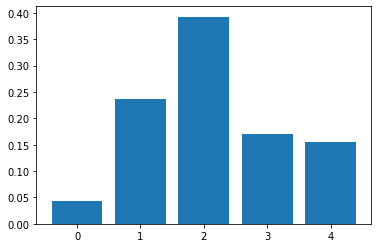

In [ ]:
from xgboost import XGBClassifier

clf7= XGBClassifier(max_depth=1, eta=0.1,reg_lambda=0.01, reg_alpha=0.1 ,nrounds = 2 )
clf7.fit(X_train, y_train)

predicted = cross_val_predict(clf7, X_test,y_test, cv=10)
# predict probabilities
probs = clf7.predict_proba(X_test)

from sklearn.metrics import log_loss
loss = log_loss(y_test, probs)
print(loss)
print("accuracy",metrics.accuracy_score(y_test, predicted))
print("f1 score macro",metrics.f1_score(y_test, predicted, average='macro'))
print("f1 score micro",metrics.f1_score(y_test, predicted, average='micro'))
print("precision score",metrics.precision_score(y_test, predicted, average='macro'))
print("recall score",metrics.recall_score(y_test, predicted, average='macro'))

print("classification_report", metrics.classification_report(y_test, predicted))

print("Training Score %.4f"%clf7.score(X_train, y_train))
print("Testing Score %.4f"%clf7.score(X_test,y_test))
plt.bar(range(len(clf7.feature_importances_)), clf7.feature_importances_)
plt.show()

In [ ]:
#confusion matrix from last decision tree classifier 
from sklearn.metrics import confusion_matrix
accurate = np.array(y_test)
predicted1 = np.array(predicted)
matrix=confusion_matrix(accurate,predicted1)
print(matrix)

[[57  8]
 [17 81]]


In [ ]:
# predict probabilities
probs = clf7.predict_proba(X_test)

from sklearn.metrics import log_loss
loss = log_loss(y_test, probs)
print(loss)

0.30059618128844295


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [ ]:
import io
data = io.BytesIO(uploaded['Test.csv']) 

In [ ]:
#Applying the model on the test set
test_1 = pd.read_csv('Test.csv', header = 0)
test_1.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [ ]:
feature_cols = test_1[['City','Location_Score','Internal_Audit_Score','External_Audit_Score','Fin_Score']]
probs = clf7.predict_proba(feature_cols)

In [ ]:
probs


array([[4.44114208e-04, 9.99555886e-01],
       [2.25729108e-01, 7.74270892e-01],
       [8.35513651e-01, 1.64486364e-01],
       [2.35098600e-03, 9.97649014e-01],
       [5.13404608e-01, 4.86595362e-01],
       [7.01590955e-01, 2.98409045e-01],
       [7.85069942e-01, 2.14930087e-01],
       [8.35513651e-01, 1.64486364e-01],
       [7.05390573e-02, 9.29460943e-01],
       [6.12443686e-03, 9.93875563e-01],
       [2.99439430e-02, 9.70056057e-01],
       [8.29306662e-01, 1.70693338e-01],
       [5.13404608e-01, 4.86595362e-01],
       [5.68243563e-01, 4.31756437e-01],
       [1.16853714e-02, 9.88314629e-01],
       [8.35513651e-01, 1.64486364e-01],
       [5.93562365e-01, 4.06437635e-01],
       [7.26425052e-01, 2.73574948e-01],
       [7.05390573e-02, 9.29460943e-01],
       [2.49803066e-04, 9.99750197e-01],
       [4.58623350e-01, 5.41376650e-01],
       [5.93562365e-01, 4.06437635e-01],
       [2.16690004e-01, 7.83309996e-01],
       [8.20714474e-01, 1.79285511e-01],
       [7.251951

In [ ]:
np.shape(probs)

(233, 2)

In [ ]:
test_file = pd.DataFrame({'0':probs[:,0],'1':probs[:,1]})

In [ ]:
from google.colab import files
test_file.to_excel('test8.xlsx', index=False) 
files.download('test8.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>